In [1]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=96f96893d8e5f1214c0433c6ea662420746a382a02e266147e8d54d4aff49bec
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 0s (323 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 121749 files and directories currentl

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
os.listdir('/content/drive/MyDrive/Resumes')

['Internship_Ravali_Musquare Technologies (1).docx',
 'React Developer_Haripriya.docx',
 'React Developer_Deepakreddy.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'React Dev_Krishna Kanth.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'React Developer_PavasGoswami.doc',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Pragnya.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'React Developer_Vinay Reddy.doc',
 'Reactjs Developer_M Lokesh.docx',
 'React Developer_Thirupathiamma.docx',
 'Reactjs Develo

In [5]:
file_dir = []
category = []

In [6]:
directory = '/content/drive/MyDrive/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_dir.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [7]:
file_dir, category

(['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \

In [8]:
file_dir_2 = []
category_2 = []

In [9]:
directory_1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_dir_2.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_2.append('PeopleSoft Resume')

In [10]:
file_dir_2, category_2

(['\n                                PeopleSoft Database Administrator\n\n\nGangareddy\n\n\n\nPROFESSIONAL OBJECTIVE:\n\n             To work in a professional and challenging environment,  while  best  utilizing  my\ntalent and keeping abreast with the latest technical advancement in  the  field  of  PeopleSoft\nApplication  DBA, by which I can derive utmost job satisfaction and knowledge of the field  and\nto become a successful in Oracle PeopleSoft Application DBA activities.\n\nPROFESSIONAL SUMMARY:\n\n    • Having  4+  years of experience as an PeopleSoft Applications ADMIN/DBA\n    • Experience in Creating and Configuring Application Server Domains.\n    • Created multiple Server domains on separate  host  systems  to  access  one  database,  an\n      effective strategy for performance and tuning.\n    • Experience in Application Server Administration.\n    • Ensured system availability by implementing failover by spreading multiple domains across\n      Multiple hosts.\n    • P

In [11]:
file_dir_3 = []
category_3 = []

In [12]:
directory_2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_dir_3.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_3.append('SQL Developer Lightning Insight Resume')

In [13]:
file_dir_3, category_3

(['resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRamalakshmi K\t\t\t\t  \n\n\t\t\t\t\t\t\t\t\t\t\t\t \n\n\t\n\n\tCareer Objective :\n\n\t    Professional objective is to pursue a career as Software Developer in the IT Industry and a position that utilizes my education and experience in the field of Information Technology, so that I can contribute to the organization and further enhances my professional skills.\n\n\n\nExperience Summary:\n\n\n\n\t2.5 year of working experience in Microsoft SQLServer /Microsoft BI, AWS-Redshift.\n\n\t Motivated and result-driven BI Developer with a proven track record in Business Intelligence (BI), Data Warehouse (DWH) and Data Analytics related projects. Proven ability to identify business needs and develop valuable solutions to drive accuracy and process efficiency. \n\n\tHave exposure to work in tools such as SQL Server Management Studio, Microsoft Visual Studio, Business Intelligence Development Studio, SQL Server Profiler, SSIS.\n\n\tWrote scripts and i

In [14]:
file_dir_4 = []
category_4 = []

In [15]:
directory_3 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_dir_4.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_4.append('Workday Resume')

In [16]:
file_dir_4, category_4

(['JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMMARY\n\nPROFESSIONAL SUMMARY\n\n\n\n\n\n\t\t3 years of Experience in Workday as Functional HCM Consultant.\n\n\t\tGood exposure in working on business improvements and process activities.\n\n\t\tExceptional ability in understanding the business needs and improving the process.\n\n\t\tExcellent communication skills and proven experience in working independently as well as in a team.\n\n\t\tInvolved in preparing business requirement documents and analysis of client functional requirements.\n\n\t\tExtensive knowledge on Complete Tenant configurations – (Supervisory Organizations, Roles, Business Processes)\n\n\tExperience in performing HCM tasks like defining Job Profiles, position creations, employee hiring, transfers, promotions, demotions and terminations etc., as part of Workday Testing requirements.\n\n\tConfiguration of Supervisory Organizations, Business Process.\n\n\tExperience working on Workday HCM Global roll out and Support proje

In [17]:
DF = pd.DataFrame(data = file_dir , columns = ['Resumes'])

In [18]:
DF['Class1'] = category

In [19]:
DF

,Resumes,Class1
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
5,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
6,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume
7,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer Resume
8,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume
9,\n CURR...,React JS Developer Resume


In [20]:
DF2 = pd.DataFrame(data = file_dir_2 , columns = ['Resumes'])
DF2['Class2'] = category_2
DF2

,Resumes,Class2
0,\n PeopleSoft D...,PeopleSoft Resume
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft Resume
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Resume
3,Classification: Internal\n\nClassification: In...,PeopleSoft Resume
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft Resume
5,\nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...,PeopleSoft Resume
6,\n|Personal Details ...,PeopleSoft Resume
7,\n PeopleSoft Admin/Peo...,PeopleSoft Resume
8,\n\nR Ahmed\n PeopleSoft Technical Consul...,PeopleSoft Resume
9,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,PeopleSoft Resume


In [21]:
DF3 = pd.DataFrame(data = file_dir_3 , columns = ['Resumes'])
DF3['Class3'] = category_3
DF3

,Resumes,Class3
0,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning Insight Resume
1,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning Insight Resume
2,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning Insight Resume
3,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume
4,\n SQL S...,SQL Developer Lightning Insight Resume
5,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume
6,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resume
8,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
9,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning Insight Resume


In [22]:
DF4 = pd.DataFrame(data = file_dir_4 , columns = ['Resumes'])
DF4['Class4'] = category_4
DF4

,Resumes,Class4
0,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume
1,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday Resume
2,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday Resume
3,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
4,\n\n Madeeswar A\n...,Workday Resume
5,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resume
6,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resume
7,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resume
8,\n[pic] Name...,Workday Resume
9,\nShireesh ...,Workday Resume


In [23]:
df = DF.append([DF2, DF3, DF4], ignore_index = True)

<ipython-input-23-e1cef8fc8305>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = DF.append([DF2, DF3, DF4], ignore_index = True)


In [24]:
df

,Resumes,Class1,Class2,Class3,Class4
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\n Har...,NaN,NaN,NaN,Workday Resume
75,G Himaja\n\n ...,NaN,NaN,NaN,Workday Resume
76,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday Resume
77,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,NaN,NaN,NaN,Workday Resume


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Resumes  79 non-null     object
 1   Class1   24 non-null     object
 2   Class2   20 non-null     object
 3   Class3   14 non-null     object
 4   Class4   21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [26]:
df['class'] = df['Class1'].fillna('') + df['Class2'].fillna('') + df['Class3'].fillna('') + df['Class4'].fillna('')
df


,Resumes,Class1,Class2,Class3,Class4,class
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\n Har...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,G Himaja\n\n ...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday Resume,Workday Resume
77,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [27]:
df.drop(columns=['Class1', 'Class2', 'Class3', 'Class4'], inplace=True)

In [28]:
df

,Resumes,class
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
...,...,...
74,\n Har...,Workday Resume
75,G Himaja\n\n ...,Workday Resume
76,\n Workday Integration Consultant\n\nName...,Workday Resume
77,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resume


In [29]:
# find out missing counts
missing_counts = df.isna().sum()
print(missing_counts)

Resumes    0
class      0
dtype: int64


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Resumes  79 non-null     object
 1   class    79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


# Data **Preprocessing**

### Change all characters to lowercase.

In [31]:
df['Resumes'] = df['Resumes'].apply(lambda txt: txt.lower())

### Exclude non-alphabetic characters, punctuation marks, and digits.


In [32]:
df['Resumes'] = df['Resumes'].apply(lambda txt: re.sub('[^a-zA-Z]', ' ', txt))

### Eliminate URL links.

In [33]:
df['Resumes'] = df['Resumes'].apply(lambda txt: re.sub('http\S+\s*', ' ', txt))

### Exclude "ResumeTitle" and "cc".


In [34]:
df['Resumes'] = df['Resumes'].apply(lambda txt: re.sub('RT|cc', ' ', txt))

### Exclude hashtags

In [35]:
df['Resumes'] = df['Resumes'].apply(lambda txt: re.sub('#\S+', '', txt))

### Eliminate mentions of users.

In [36]:
df['Resumes'] = df['Resumes'].apply(lambda txt: re.sub('@\S+', '  ', txt))

### Eliminate additional spaces.

In [37]:
df['Resumes'] = df['Resumes'].apply(lambda txt: re.sub('\s+', ' ', txt))

### Tokenize words:

In [38]:
df['Resumes'] = df['Resumes'].apply(lambda txt: nltk.tokenize.word_tokenize(txt))

### Exclude stopwords.

In [39]:
df['Resumes'] = df['Resumes'].apply(lambda txt: [w for w in txt if not w in nltk.corpus.stopwords.words('english')])

### Stemming:

In [40]:
df['Resumes'] = df['Resumes'].apply(lambda txt: ' '.join(txt))

In [41]:
df.to_csv('preprocessed_Resumes.csv', index=False)

In [42]:
data = pd.read_csv('preprocessed_Resumes.csv')
data

,Resumes,class
0,name ravali p curriculum vitae specialization ...,React JS Developer Resume
1,haripriya battina experience ui developer reac...,React JS Developer Resume
2,kanumuru deepak reddy career objective secure ...,React JS Developer Resume
3,ui developer react js developer name krishna p...,React JS Developer Resume
4,susovan bag seeking challenging position field...,React JS Developer Resume
...,...,...
74,hari krishna summary result oriented professio...,Workday Resume
75,g himaja career objective work towards achievi...,Workday Resume
76,workday integration consultant name sri krishn...,Workday Resume
77,venkata saikrishna workday consultant profssio...,Workday Resume


# **Exploratory Data Analysis(EDA)**

In [43]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 452), ('workday', 431), ('application', 417), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 249), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 191), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 181), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 151), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('role', 142), ('oracle', 142), ('developer', 139), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 127), ('work', 124), ('custom', 124), ('js', 123

In [44]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [45]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

mask_image = np.array(Image.open("img.jpg"))
wc = WordCloud(background_color = "white", max_words = 700, mask = mask_image, stopwords = set(STOPWORDS))

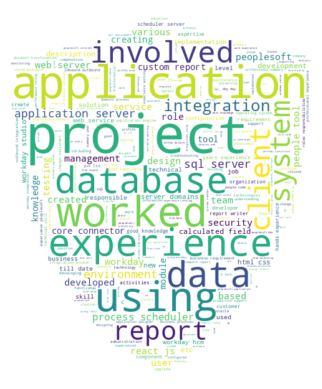

In [46]:
wc.generate(cleanedSentences)
wc.to_file("img.jpg")
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [47]:
Categories = np.sort(df['class'].unique())
Categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [48]:
df_categories = [df[df['class'] == category].loc[:, ['Resumes', 'class']] for category in Categories]
df_categories

[                                              Resumes              class
 24  peoplesoft database administrator gangareddy p...  PeopleSoft Resume
 25  profile summary years experience implementing ...  PeopleSoft Resume
 26  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 27  classification internal classification interna...  PeopleSoft Resume
 28  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 29  vinod akkala peoplesoft dba admin professional...  PeopleSoft Resume
 30  personal details name pritam biswas date birth...  PeopleSoft Resume
 31  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 32  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resume
 33  arun venu experience summary experience years ...  PeopleSoft Resume
 34  hari narayana professional summary years exper...  PeopleSoft Resume
 35  priyabrata hota career objective pursuing peop...  PeopleSoft Resume
 36  peoplesoft administration vivekan

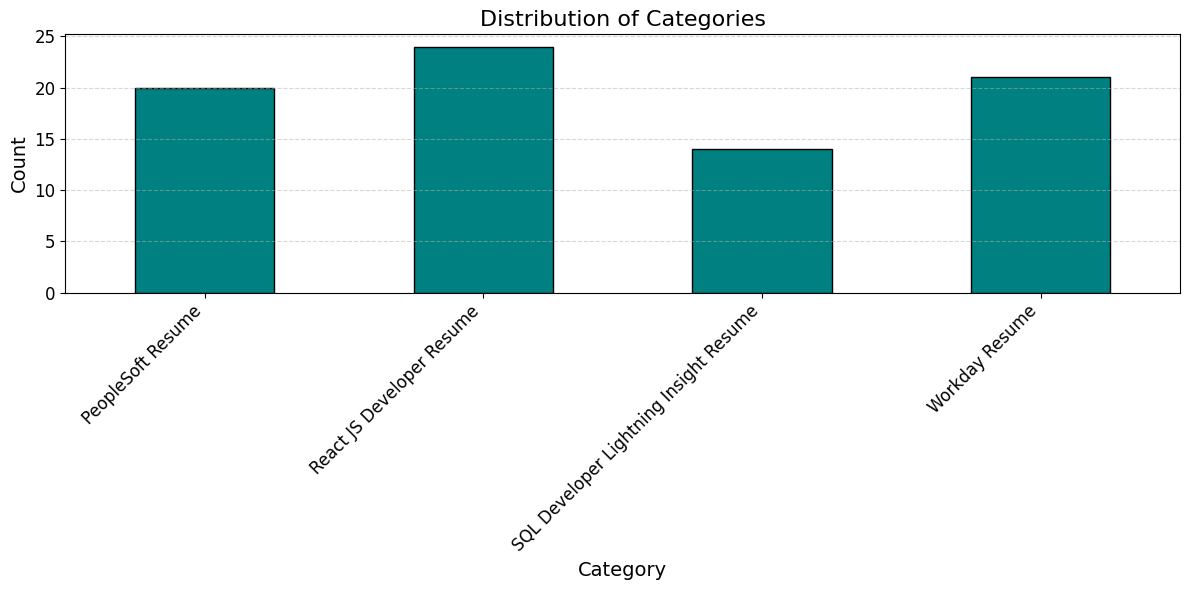

In [49]:
import matplotlib.pyplot as plt

category_counts = df['class'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='#008080', edgecolor='black')
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [50]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [51]:
# To try different theme : plt.style.available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [52]:
# to try other color map:  plt.colormaps()
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [53]:
PLOT_PALETTE =  'seaborn-v0_8-ticks'
WORDCLOUD_COLOR_MAP =  'viridis_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

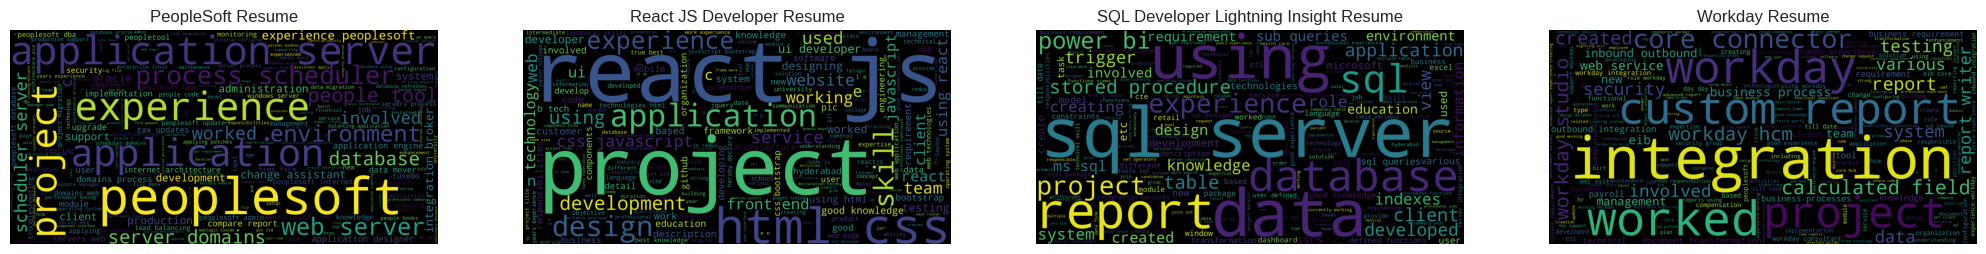

In [54]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(Categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [55]:
def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

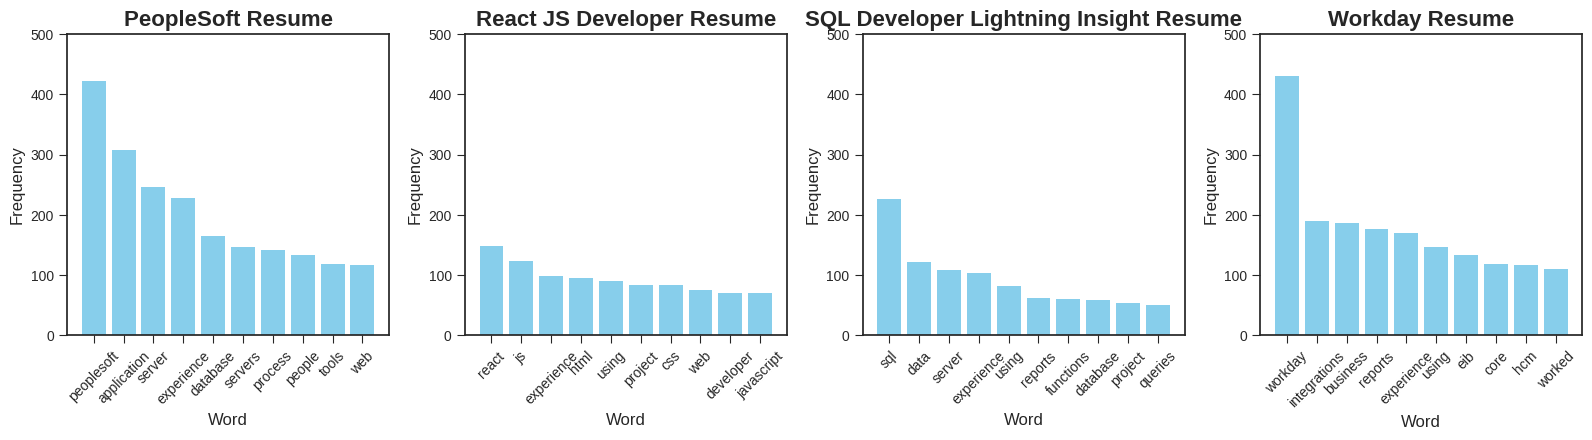

In [56]:
fig = plt.figure(figsize=(20, 20))

for i, category in enumerate(Categories):
    wf = wordfreq(df_categories[i])

    ax = fig.add_subplot(5, 5, i + 1)
    ax.set_title(category, fontsize=16, fontweight='bold')
    ax.bar(wf['Word'], wf['Frequency'], color='skyblue')

    ax.set_xlabel('Word', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    ax.tick_params(axis='x', rotation=45)

    ax.set_ylim(0, 500)

plt.tight_layout()
plt.show()
plt.close()


In [57]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['class']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [58]:
df

,Resumes,class
0,name ravali p curriculum vitae specialization ...,1
1,haripriya battina experience ui developer reac...,1
2,kanumuru deepak reddy career objective secure ...,1
3,ui developer react js developer name krishna p...,1
4,susovan bag seeking challenging position field...,1
...,...,...
74,hari krishna summary result oriented professio...,3
75,g himaja career objective work towards achievi...,3
76,workday integration consultant name sri krishn...,3
77,venkata saikrishna workday consultant profssio...,3


In [59]:
pd.value_counts(df['class'])

1    24
3    21
0    20
2    14
Name: class, dtype: int64

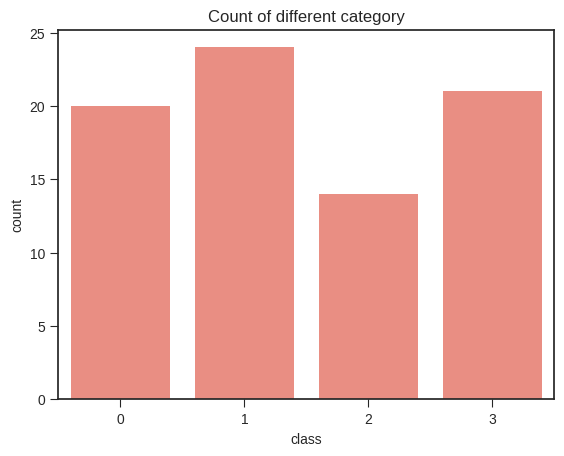

In [60]:
import seaborn as sns
sns.countplot(x='class', data=df, color='salmon')
plt.title('Count of different category')
plt.show()

<ipython-input-61-d6573bde3adc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="class", data=df, palette=palette)


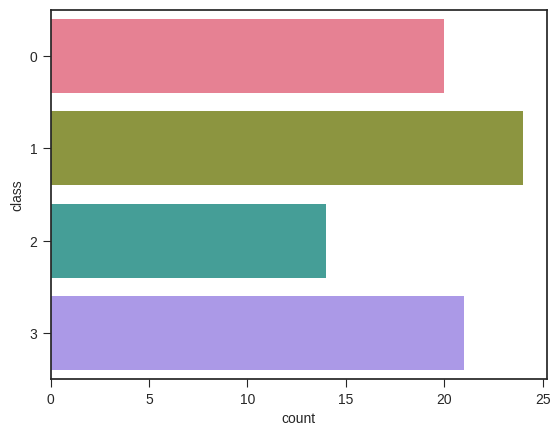

In [61]:
palette = sns.color_palette("husl", len(df['class'].unique()))

sns.countplot(y="class", data=df, palette=palette)
plt.show()

In [62]:
Occurrences = df['class'].value_counts().reset_index()['class']
Groups = df['class'].value_counts().reset_index()['index']


In [63]:
Occurrences

0    24
1    21
2    20
3    14
Name: class, dtype: int64

In [64]:
Groups

0    1
1    3
2    0
3    2
Name: index, dtype: int64

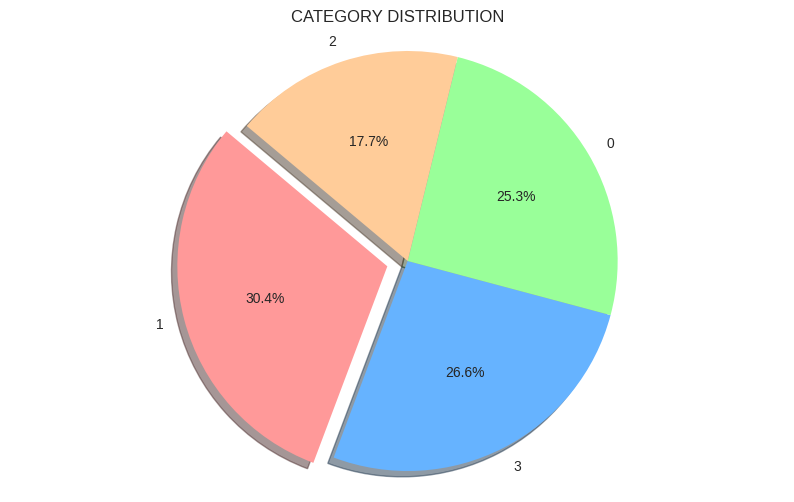

In [65]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import random

Groups = ['1', '3', '0', '2']
Occurrences = ['24', '21', '20', '14']

plt.figure(1, figsize=(10, 6))
the_grid = GridSpec(1, 1)
plt.subplot(the_grid[0, 0], aspect=1, title='CATEGORY DISTRIBUTION')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0)

start_angle = 140

source_pie = plt.pie(Occurrences, labels=Groups, autopct='%1.1f%%', shadow=True, colors=colors, explode=explode, startangle=start_angle)
plt.axis('equal')

plt.show()


In [66]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 1832
Number of words not Lemmatized= 0


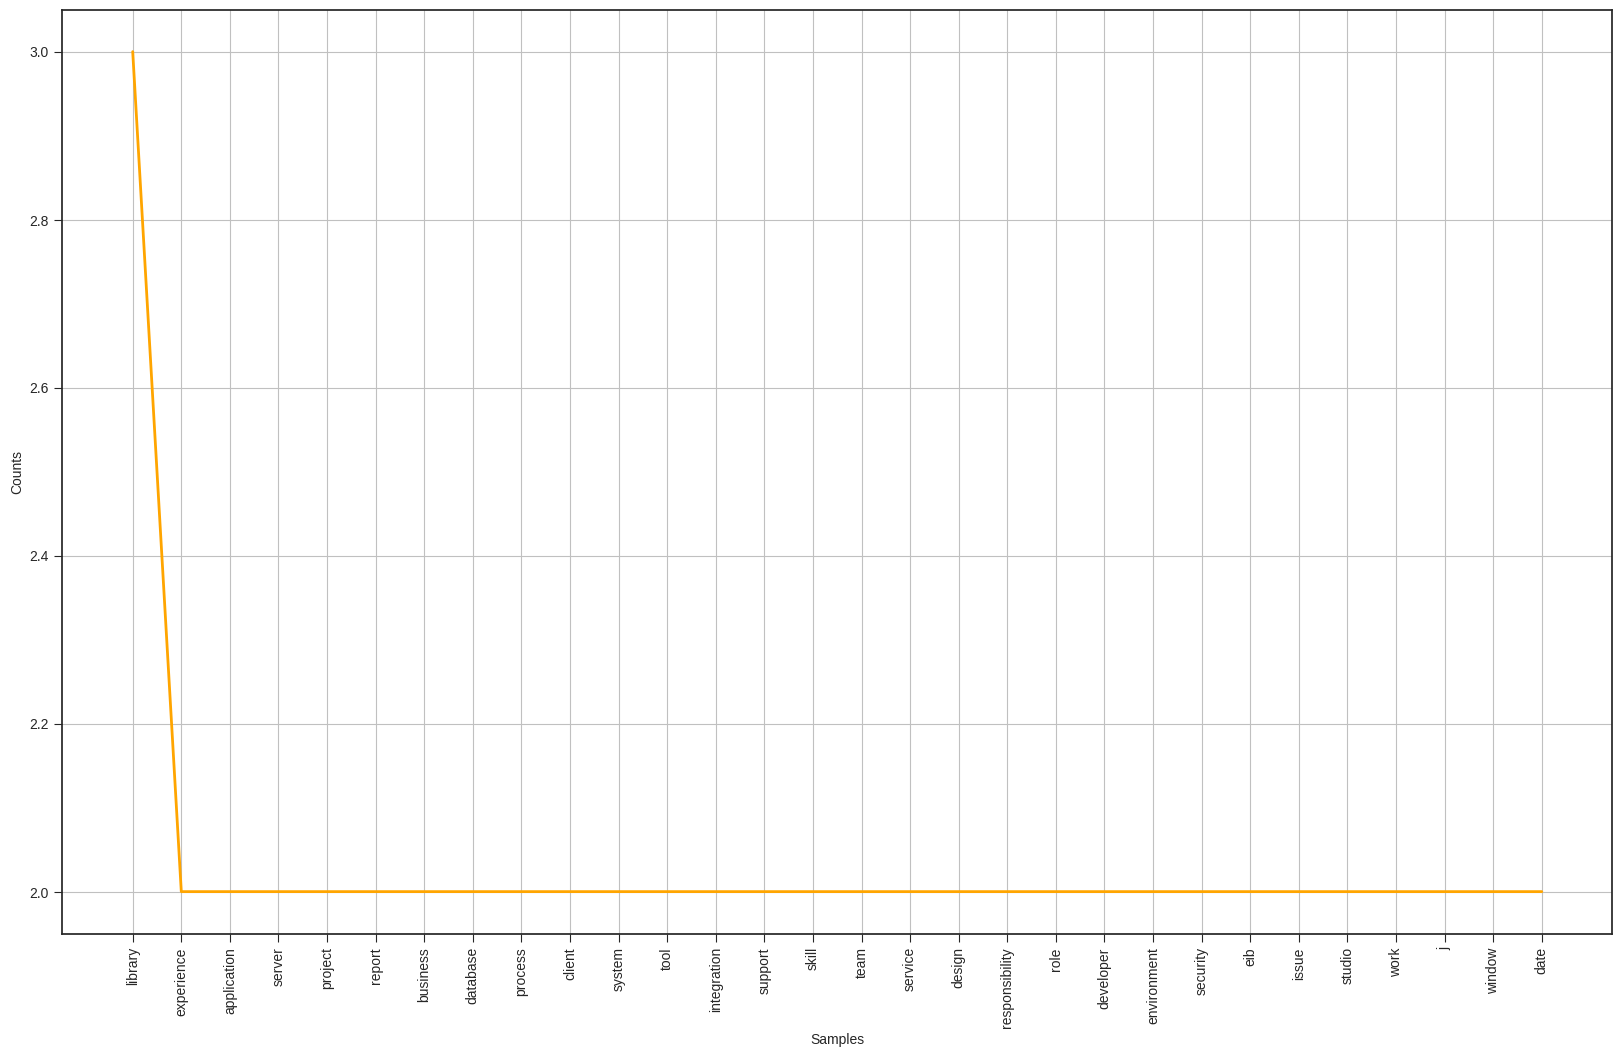

<Axes: xlabel='Samples', ylabel='Counts'>

In [67]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20, 12))
freq_dist.plot(30, color='orange')

# **Model Building**

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [69]:
requiredText = df['Resumes'].values
requiredTarget = df['class'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature extraction completed .....")


Feature extraction completed .....


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=42, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4459), (16, 4459))

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [74]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 1.0000


In [75]:
print("\n Classification report for the Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for the Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [76]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

In [77]:
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [78]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.9375


In [79]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [80]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

In [81]:
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9375
f1-Score         :  0.9416
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [82]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.8750


In [83]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.92      0.85      0.86        16
weighted avg       0.92      0.88      0.88        16




In [84]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

In [85]:
print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy Score  :  0.875
Precision Score :  0.9167
Recall Score    :  0.8542
f1-Score        :  0.8643
Confusion Matrix:
 [[3 0 0 1]
 [0 5 0 0]
 [0 0 2 1]
 [0 0 0 4]]


In [86]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.9375


In [87]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [88]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

In [89]:
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [90]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, classification_report(y_test, prediction_5, zero_division='warn')))


Accuracy of AdaBoost Classifier on training set: 0.7460
Accuracy of AdaBoost Classifier on test set    : 0.7500

 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.64      0.75      0.68        16
weighted avg       0.61      0.75      0.66        16




In [91]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

In [92]:
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy Score  :  0.75
Precision Score :  0.6389
Recall Score    :  0.75
f1-Score        :  0.6786
Confusion Matrix:
 [[0 4 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [93]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 1.0000


In [94]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [95]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

In [96]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [97]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [98]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 1.0000


In [99]:
print("\n Classification report for XtremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for XtremeGradientBoosting Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
       

In [100]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

In [101]:
print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [102]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_8 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 149
[LightGBM] [Info] Start training from score -1.370546
[LightGBM] [Info] Start training from score -1.198696
[LightGBM] [Info] Start training from score -1.745239
[LightGBM] [Info] Start training from score -1.309921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [103]:
print("\n Classification report for LightGradientBoosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_8)))


 Classification report for LightGradientBoosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [104]:
accuracy_8 = round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)

In [105]:
print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_8))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [107]:
data = {
    'Classifier': ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier',
                   'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier',
                   'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'],
    'Accuracy Score': [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8],
    'Precision Score': [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8],
    'Recall Score': [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8],
    'f1-Score': [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8]
}

table = pd.DataFrame(data)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightcoral' if v else '' for v in is_max]

styled_table = table.style.apply(highlight_max, subset=['Accuracy Score', 'Precision Score', 'Recall Score', 'f1-Score'])

styled_table


,Classifier,Accuracy Score,Precision Score,Recall Score,f1-Score
0,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
1,SVM Classifier,0.937500,0.958300,0.937500,0.941600
2,Multinomial NB Classifier,0.875000,0.916700,0.854200,0.864300
3,Logistic Regression,0.937500,0.958300,0.937500,0.941600
4,AdaBoost Classifier,0.750000,0.638900,0.750000,0.678600
5,Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000
6,Xtreme Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000
7,Light Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000
